In [1]:
#import libries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Read file from the csv as a dataframe and display the data
air_quality=pd.read_csv('../data/Climate Change - datasets/Air Quality Index.csv')
air_quality

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
18116,2025-03-06,United States of America,Moderate,82
18117,2025-03-06,Uzbekistan,Good,17
18118,2025-03-06,Vatican,Moderate,65
18119,2025-03-06,Venezuela,Good,11


### explain column names

In [3]:
#function to check understand the dataset:
def data_understanding(df): 
    print('Check the number of rows and columns')
    print(f'The dataset has {df.shape[0]} rows')
    print(f'The dataset has {df.shape[1]} columns\n')
    
    print('Check data info')
    print(df.info())  # Includes column types and missing values
    print('\n')

    print('Check missing values')
    print(df.isna().sum()/len(df)*100)  # Shows missing values per column
    print('\n')

    print('Check data statistics (numeric)')
    print(df.describe())  # Summary statistics for numerical data
    print('\n')

    print('Check data statistics (categorical)')
    print(df.describe(include='O'))  # Summary for categorical data
    print('\n')

    print('Check for duplicates')
    print(f'Duplicates: {df.duplicated().sum()}')  # Number of duplicate rows

# Call the function
data_understanding(air_quality)


Check the number of rows and columns
The dataset has 18121 rows
The dataset has 4 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18121 entries, 0 to 18120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18121 non-null  object
 1   Country    18121 non-null  object
 2   Status     18121 non-null  object
 3   AQI Value  18121 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 566.4+ KB
None


Check missing values
Date         0.0
Country      0.0
Status       0.0
AQI Value    0.0
dtype: float64


Check data statistics (numeric)
          AQI Value
count  18121.000000
mean      63.708515
std       50.174970
min        1.000000
25%       29.000000
50%       53.000000
75%       83.000000
max      963.000000


Check data statistics (categorical)
              Date Country Status
count        18121   18121  18121
unique         125     142      6
top     2022-07-22   Kenya   Good


In [4]:
print(f'The dataset has {air_quality.shape[0]} rows')
print(f'The dataset has {air_quality.shape[1]} columns')

The dataset has 18121 rows
The dataset has 4 columns


In [5]:
#data info
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18121 entries, 0 to 18120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       18121 non-null  object
 1   Country    18121 non-null  object
 2   Status     18121 non-null  object
 3   AQI Value  18121 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 566.4+ KB


no missing values in the dataset, date is object we will need to convert to date format.coutry and status to be one hot encoded prior to modelling

In [6]:
#confirm no missing values
air_quality.isna().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

In [7]:
#check data statistics
air_quality.describe()

,AQI Value
count,18121.000000
mean,63.708515
std,50.174970
min,1.000000
25%,29.000000
50%,53.000000
75%,83.000000
max,963.000000


aqi - standardized measure of air pollution levels
0–50	Good	Air quality is excellent, no health risks.
51–100	Moderate	Acceptable air quality, but some sensitive groups may experience minor issues.
101–150	Unhealthy for Sensitive Groups	People with respiratory issues (asthma, elderly, children) may be affected.
151–200	Unhealthy	Everyone may start experiencing health effects, sensitive groups more at risk.
201–300	Very Unhealthy	Health warnings issued, serious effects on entire population.
301+	Hazardous	Emergency conditions, serious health risks.

on average there us moderate aqi levels (53) close to excellent air quality.
max is 963 is it an outlier

In [8]:
#check airquality > 300  which is harzadeous
print(air_quality.query('`AQI Value`>300').sort_values(by='AQI Value')['Country'].value_counts())
air_quality.query('`AQI Value`>300').sort_values(by='AQI Value')

India                       17
Burkina Faso                 9
Iraq                         7
Germany                      7
United States of America     7
Ethiopia                     4
China                        4
Bangladesh                   4
United Arab Emirates         3
Kuwait                       3
Chad                         3
Zambia                       2
Netherlands                  2
Thailand                     2
Myanmar                      2
Nepal                        1
Chile                        1
Gabon                        1
Iran                         1
Cambodia                     1
Uganda                       1
Uzbekistan                   1
Name: Country, dtype: int64


,Date,Country,Status,AQI Value
11120,2023-05-18,Burkina Faso,Hazardous,301
17067,2025-01-09,India,Hazardous,303
10706,2023-04-27,Burkina Faso,Hazardous,303
13899,2024-07-11,United States of America,Hazardous,303
10287,2023-04-06,Burkina Faso,Hazardous,304
...,...,...,...,...
16214,2024-11-21,India,Hazardous,569
4435,2022-08-16,Iraq,Hazardous,590
4224,2022-08-14,United Arab Emirates,Hazardous,862
4365,2022-08-15,United Arab Emirates,Hazardous,868


highest aqi recorded in china, followed by united Emirates. Country with the highest numbe rof iqa levels i.e> 300 is India, followed by burkina faso and Iraq respectively

In [9]:
#check data statistics for strings
air_quality.describe(include = 'O')

,Date,Country,Status
count,18121,18121,18121
unique,125,142,6
top,2022-07-22,Kenya,Good
freq,423,134,8542


**most common (top)**

date 2022-07-22 with 423 records
country kenya with 134 records
status good appearing 8542 times

In [10]:
#check for duplicates
print(air_quality.duplicated().sum())
#checking theduplicates
air_quality[air_quality.duplicated(keep=False)].sort_values(by=['Date','Country','Status','AQI Value'])

300


,Date,Country,Status,AQI Value
1,2022-07-21,Algeria,Moderate,65
143,2022-07-21,Algeria,Moderate,65
10,2022-07-21,Bangladesh,Unhealthy for Sensitive Groups,141
152,2022-07-21,Bangladesh,Unhealthy for Sensitive Groups,141
18,2022-07-21,Brunei,Good,15
...,...,...,...,...
13249,2024-06-06,Venezuela,Good,10
13117,2024-06-06,Vietnam,Moderate,63
13250,2024-06-06,Vietnam,Moderate,63
13118,2024-06-06,Zambia,Unhealthy for Sensitive Groups,140


In [11]:
#drop duplicates
air_quality.drop_duplicates(inplace=True)
#confirm drop
len(air_quality)

17821

In [12]:
#function to check understand the dataset:
def data_understanding(df): 
    print('Check the number of rows and columns')
    print(f'The dataset has {df.shape[0]} rows')
    print(f'The dataset has {df.shape[1]} columns\n')
    
    print('Check data info')
    print(df.info())  # Includes column types and missing values
    print('\n')

    print('Check missing values')
    print(df.isna().sum())  # Shows missing values per column
    print(df.isna().sum()/len(df)*100)
    print('\n')

    print('Check data statistics (numeric)')
    display(df.describe())  # Summary statistics for numerical data
    print('\n')

    print('Check data statistics (categorical)')
    display(df.describe(include='O'))  # Summary for categorical data
    print('\n')

    print('Check for duplicates')
    print(f'Dataset has {df.duplicated().sum()} Duplicates ')  # Number of duplicate rows

# Call the function
data_understanding(air_quality)


Check the number of rows and columns
The dataset has 17821 rows
The dataset has 4 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17821 entries, 0 to 18120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       17821 non-null  object
 1   Country    17821 non-null  object
 2   Status     17821 non-null  object
 3   AQI Value  17821 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 696.1+ KB
None


Check missing values
Date         0
Country      0
Status       0
AQI Value    0
dtype: int64
Date         0.0
Country      0.0
Status       0.0
AQI Value    0.0
dtype: float64


Check data statistics (numeric)


,AQI Value
count,17821.000000
mean,63.643005
std,50.072823
min,1.000000
25%,29.000000
50%,53.000000
75%,83.000000
max,963.000000




Check data statistics (categorical)


,Date,Country,Status
count,17821,17821,17821
unique,125,142,6
top,2022-07-22,Taiwan,Good
freq,384,134,8410




Check for duplicates
Dataset has 0 Duplicates 


In [13]:
#convert date to datetime
air_quality['Date']  = pd.to_datetime(air_quality['Date'],format = '%Y/%m/%d')
#check if date been converted to datetime
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17821 entries, 0 to 18120
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       17821 non-null  datetime64[ns]
 1   Country    17821 non-null  object        
 2   Status     17821 non-null  object        
 3   AQI Value  17821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 696.1+ KB


### EDA

### Air quality trends over time

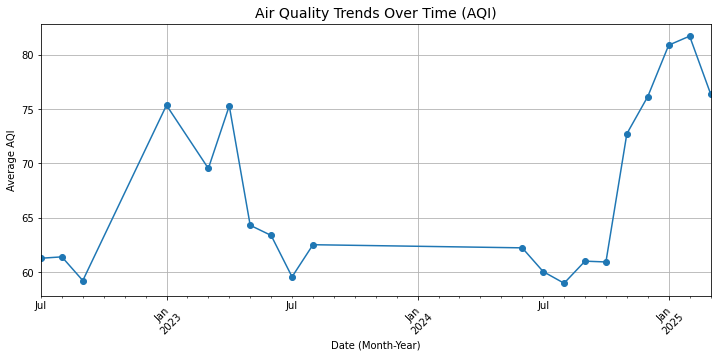

In [14]:
# Aggregate AQI values by month or year
# monthly_aqi = air_quality.groupby(air_quality['Date'].dt.to_period('m'))['AQI Value'].mean()
monthly_aqi = air_quality.groupby(air_quality['Date'].dt.to_period('m'))['AQI Value'].mean()
# Plot AQI trends over time
plt.figure(figsize=(12,5))
monthly_aqi.plot(marker='o')
plt.title('Air Quality Trends Over Time (AQI)', fontsize=14)
plt.xlabel('Date (Month-Year)')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Fluctuating AQI Levels:

The AQI values fluctuate over time, showing multiple peaks and drops.
There are significant increases around January 2023 and January 2025, indicating seasonal or external factors affecting air quality.
Stable Periods:

Between mid-2023 and mid-2024, the AQI remained relatively stable, staying between 60-65.
This suggests a period of relatively consistent air quality.
Sharp Rise in Late 2024 - Early 2025:

Around late 2024, AQI starts increasing rapidly, reaching its peak in early 2025 (over 80).
This suggests a period of worsening air quality, possibly due to environmental or human-driven factors (e.g., pollution, seasonal changes).
Recent Decline in 2025:

After the highest AQI peak, there's a slight drop, indicating some improvement in air quality.

### Countries with the worse air quality

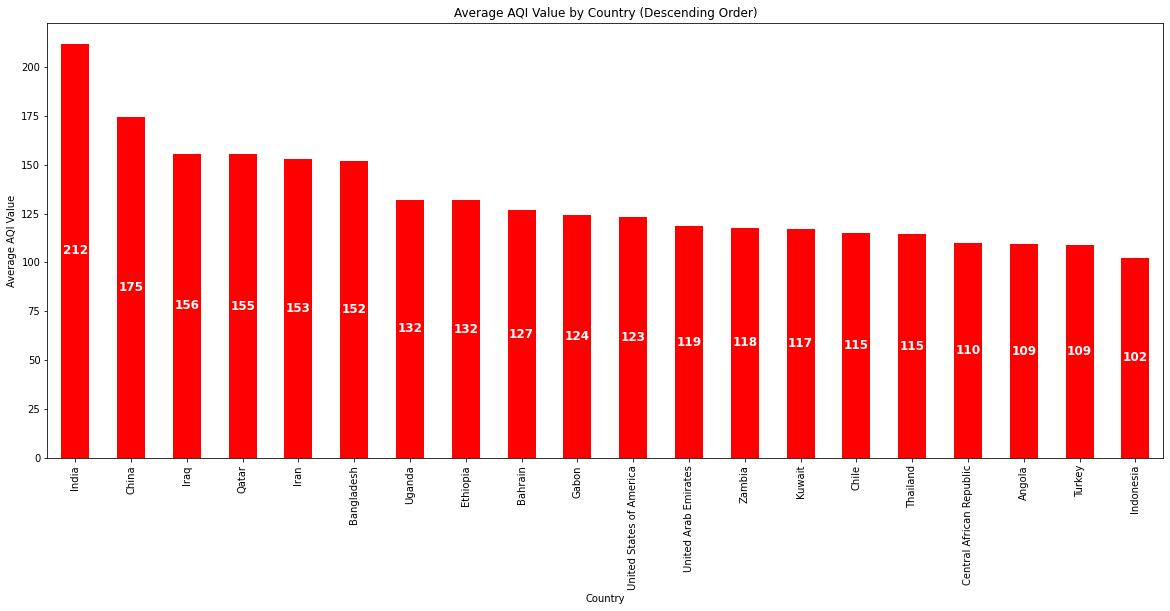

In [15]:
plt.figure(figsize=(20,8))
#get top 20
country_quality = air_quality.groupby(['Country'])['AQI Value'].mean().sort_values(ascending=False).head(20)
ax = country_quality.plot(kind='bar',color='r')
# Add labels inside bars
# Add labels inside bars (correct container)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=12, color='white', fontweight='bold')

plt.xlabel("Country")
plt.ylabel("Average AQI Value")
plt.title("Average AQI Value by Country (Descending Order)");

India has on average the worst air quality followed by china,iraq and qatar respectively

### category

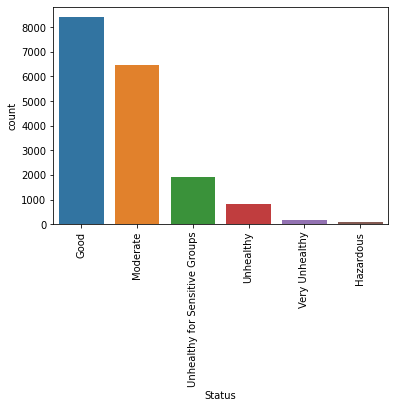

In [16]:
sns.countplot(data=air_quality,x='Status')
plt.xticks(rotation=90);

good air quality overall and harzadous few times

### Second dataset

In [17]:
source_industry = pd.read_csv('../data/Climate Change - datasets/co2-by-source industry all countries.csv')
source_industry

,Entity,Code,Year,Annual CO₂ emissions from other industry,Annual CO₂ emissions from flaring,Annual CO₂ emissions from cement,Annual CO₂ emissions from gas,Annual CO₂ emissions from oil,Annual CO₂ emissions from coal
0,Afghanistan,AFG,1970,NaN,297436.0,47350.0,216651.0,671986.0,436974.0
1,Afghanistan,AFG,1971,NaN,304112.0,43234.0,439680.0,747456.0,359072.0
2,Afghanistan,AFG,1972,NaN,366400.0,46427.0,300448.0,626544.0,190528.0
3,Afghanistan,AFG,1973,NaN,223005.0,67106.0,332680.0,701918.0,310745.0
4,Afghanistan,AFG,1974,NaN,367102.0,70301.0,400141.0,770914.0,304695.0
...,...,...,...,...,...,...,...,...,...
34757,Zimbabwe,ZWE,1989,NaN,NaN,299830.0,NaN,2202064.0,13611760.0
34758,Zimbabwe,ZWE,1990,NaN,NaN,287369.0,NaN,1835232.0,13414412.0
34759,Zimbabwe,ZWE,1991,NaN,NaN,354568.0,NaN,2363280.0,12772704.0
34760,Zimbabwe,ZWE,1992,NaN,NaN,368354.0,NaN,2818233.0,13515790.0


In [18]:
### understand the dataset
data_understanding(source_industry)

Check the number of rows and columns
The dataset has 34762 rows
The dataset has 9 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34762 entries, 0 to 34761
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    34762 non-null  object 
 1   Code                                      29748 non-null  object 
 2   Year                                      34762 non-null  int64  
 3   Annual CO₂ emissions from other industry  3202 non-null   float64
 4   Annual CO₂ emissions from flaring         15952 non-null  float64
 5   Annual CO₂ emissions from cement          28863 non-null  float64
 6   Annual CO₂ emissions from gas             18014 non-null  float64
 7   Annual CO₂ emissions from oil             25218 non-null  float64
 8   Annual CO₂ emissions from coal            21755 non-null  float64
dtyp

,Year,Annual CO₂ emissions from other industry,Annual CO₂ emissions from flaring,Annual CO₂ emissions from cement,Annual CO₂ emissions from gas,Annual CO₂ emissions from oil,Annual CO₂ emissions from coal
count,34762.000000,3.202000e+03,1.595200e+04,2.886300e+04,1.801400e+04,2.521800e+04,2.175500e+04
mean,1925.849836,1.461601e+07,5.822789e+06,7.767745e+06,7.362119e+07,1.146587e+08,1.841199e+08
std,73.500633,3.851871e+07,2.666425e+07,6.259529e+07,3.926480e+08,6.450573e+08,8.424316e+08
min,1750.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1876.000000,8.124250e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.427200e+04,6.640650e+04
50%,1945.000000,1.352505e+06,0.000000e+00,0.000000e+00,1.465600e+04,1.365270e+06,2.088480e+06
75%,1987.000000,6.392000e+06,3.320710e+05,4.859895e+05,6.274830e+06,1.415719e+07,2.787020e+07
max,2023.000000,3.053810e+08,4.352632e+08,1.696308e+09,7.922980e+09,1.241197e+10,1.540122e+10




Check data statistics (categorical)


,Entity,Code
count,34762,29748
unique,237,217
top,Afghanistan,AFG
freq,274,274




Check for duplicates
Dataset has 0 Duplicates 


There are missing values in most columns. Drop columns with more than 50% missing values i.e column `Annual CO₂ emissions from other industry` and `Annual CO₂ emissions from flaring`. Impute median to the missing numerical column.for the code columns we will add a placeholder since  the missing values  seem to be geographical or eonomical regions used in the dataset.They likely represent different continents, economic groups and specific international sectors.

`describe shows`
The median year (1945) suggests that a significant portion of the dataset covers the post-World War II era, a period of rapid industrial growth.
The majority of data (75%) is before 1987, indicating that while modern data exists, much of the dataset focuses on historical trends.annual emisons form cement are mimimal or none.coals seems to have more emissions followed by oil

For categorical columns Afghanistan is the most frequent Entity and code subsequently.

They are no duplicates in the dataset

In [19]:
#Drop columns with more than 50% missing values
source_industry.drop(columns = ['Annual CO₂ emissions from other industry','Annual CO₂ emissions from flaring'],inplace=True)

#fill missing values with median
columns = ['Annual CO₂ emissions from cement', 
           'Annual CO₂ emissions from gas', 
           'Annual CO₂ emissions from oil', 
           'Annual CO₂ emissions from coal']

# for col in columns:
#     source_industry[col].fillna(source_industry[col].median(),inplace=True)
source_industry[columns] = source_industry[columns].apply(lambda x: x.fillna(x.median()))


In [20]:
#check the missing code entities
print(source_industry.query('Code.isna()')['Entity'].unique())

['Africa' 'Asia' 'Asia (excl. China and India)' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'High-income countries' 'International aviation'
 'International shipping' 'Kuwaiti Oil Fires (GCP)' 'Low-income countries'
 'Lower-middle-income countries' 'North America'
 'North America (excl. USA)' 'Oceania' 'Ryukyu Islands (GCP)'
 'South America' 'Upper-middle-income countries']


code has some missing values which seem to be geographical or eonomical regions used in the dataset.They likely represent different continents, economic groups and specific international sectors. Fill the NAN with placeholder regions. 

In [21]:
#fill code NAN
source_industry['Code'].fillna('Region',inplace=True)
#confirm fill
print(source_industry.isna().sum())

Entity                              0
Code                                0
Year                                0
Annual CO₂ emissions from cement    0
Annual CO₂ emissions from gas       0
Annual CO₂ emissions from oil       0
Annual CO₂ emissions from coal      0
dtype: int64


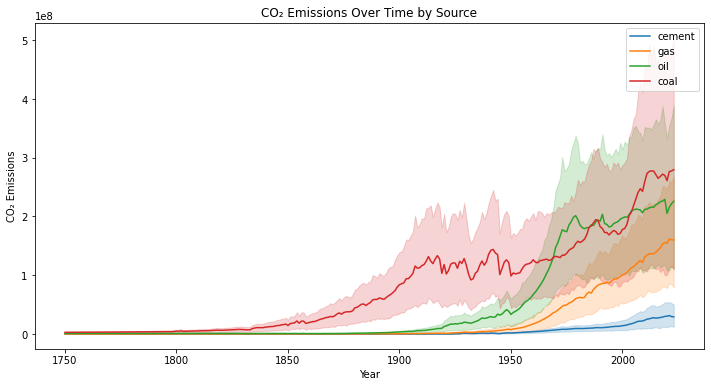

In [22]:
# EDA
# Time-Series Line Chart: CO₂ Emissions Over Time
plt.figure(figsize=(12, 6))
for col in ['Annual CO₂ emissions from cement', 'Annual CO₂ emissions from gas',
            'Annual CO₂ emissions from oil', 'Annual CO₂ emissions from coal']:
    sns.lineplot(x='Year', y=col, data=source_industry, label=col.split()[-1])
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.title("CO₂ Emissions Over Time by Source")
plt.legend();

upward trend in missions with coal followed by oil with great emissions

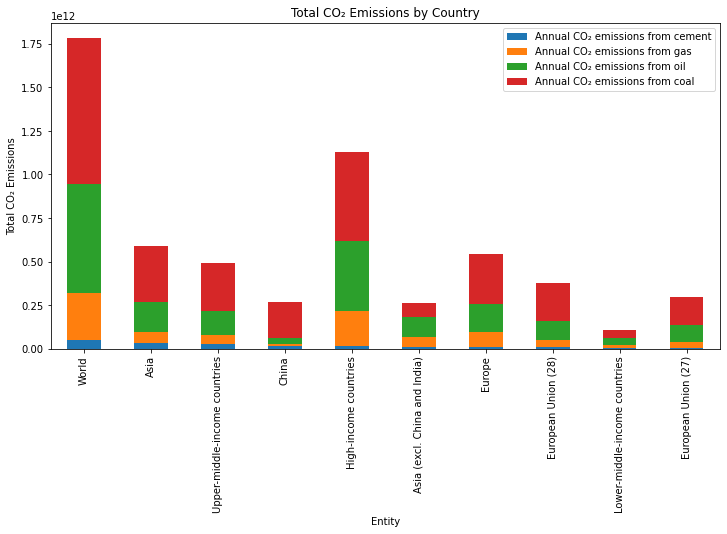

In [23]:
#Emisions by country
country_emissions = source_industry.groupby('Entity')[['Annual CO₂ emissions from cement', 'Annual CO₂ emissions from gas',
            'Annual CO₂ emissions from oil', 'Annual CO₂ emissions from coal']].sum().sort_values(by=['Annual CO₂ emissions from cement', 'Annual CO₂ emissions from gas',
                                         'Annual CO₂ emissions from oil', 'Annual CO₂ emissions from coal'],ascending=False).head(10)
country_emissions.plot(kind='bar',stacked=True, figsize=(12, 6))

plt.ylabel("Total CO₂ Emissions")
plt.title("Total CO₂ Emissions by Country")
plt.show()


Coal remains to be the highest emitter of co2 with Asia and China leading.
Europe has lower emissiions 

### Third Dataset

In [24]:
co2emissions_bysector = pd.read_csv('../data/Climate Change - datasets/co2-emissions-by-sector.csv')
co2emissions_bysector

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,NaN,320000.0,20000.00
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,NaN,300000.0,20000.00
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,NaN,200000.0,20000.00
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,NaN,200000.0,20000.00
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,NaN,190000.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,1070000.00,470000.0,87160000.0,250000.0,2000000.0,1240000.0,NaN,5100000.0,129999.99
6556,Zimbabwe,ZWE,2018,1030000.00,560000.0,87160000.0,320000.0,2620000.0,1540000.0,NaN,5400000.0,160000.00
6557,Zimbabwe,ZWE,2019,890000.00,470000.0,87160000.0,280000.0,2240000.0,1610000.0,NaN,4990000.0,160000.00
6558,Zimbabwe,ZWE,2020,970000.00,500000.0,87160000.0,340000.0,1510000.0,1400000.0,NaN,3840000.0,60000.00


In [25]:
data_understanding(co2emissions_bysector)

Check the number of rows and columns
The dataset has 6560 rows
The dataset has 12 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        6560 non-null   object 
 1   Code                                                          6208 non-null   object 
 2   Year                                                          6560 non-null   int64  
 3   Carbon dioxide emissions from buildings                       6421 non-null   float64
 4   Carbon dioxide emissions from industry                        6305 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry    6557 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion  

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
count,6560.000000,6.421000e+03,6.305000e+03,6.557000e+03,6.421000e+03,6.421000e+03,6.421000e+03,2.270000e+03,6.421000e+03,6.421000e+03
mean,2005.500000,5.509696e+07,2.142031e+07,2.577066e+07,1.246594e+07,1.164675e+08,1.013822e+08,1.588207e+07,2.516014e+08,1.931317e+07
std,9.233796,2.525762e+08,1.187214e+08,2.464913e+08,5.762671e+07,5.786553e+08,5.153394e+08,4.129882e+07,1.216841e+09,9.489783e+07
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1997.750000,8.000000e+04,0.000000e+00,-6.700000e+05,0.000000e+00,5.800000e+05,1.600000e+05,4.800000e+05,2.100000e+05,6.000000e+04
50%,2005.500000,6.400000e+05,4.800000e+05,3.000000e+04,2.400000e+05,3.170000e+06,1.500000e+06,2.400000e+06,3.980000e+06,5.500000e+05
75%,2013.250000,7.500000e+06,2.990000e+06,9.940000e+06,2.060000e+06,1.841000e+07,1.338000e+07,6.890000e+06,3.398000e+07,3.200000e+06
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,3.227600e+08,1.622524e+10,1.325790e+09




Check data statistics (categorical)


,Entity,Code
count,6560,6208
unique,205,194
top,Afghanistan,AFG
freq,32,32




Check for duplicates
Dataset has 0 Duplicates 


Missing values in most columns drop column `Fugitive emissions of carbon dioxide from energy production ` since it has 65 % missing values and fill the other with median. For missing code add placeholder 'Region'

From data description electricity and heat production is the largest CO2 contributor, followed by industry and manufacturig.Transport is another major source as well. Land-use chnage can have negative emissions, indicating carbon absorption by forests in some cases.Bunker fuels contribute significantly, highlighting the impact of aviation and shipping.

on categorical columns afghanisan appears most frequently 

no duplicates in the dataset.

Afghanistan 

In [26]:
#Drop columns with more than 50% missing values
co2emissions_bysector.drop(columns = ['Fugitive emissions of carbon dioxide from energy production'],inplace=True)

#fill missing values with median
columns = ['Carbon dioxide emissions from buildings',
       'Carbon dioxide emissions from industry',
       'Carbon dioxide emissions from land use change and forestry',
       'Carbon dioxide emissions from other fuel combustion',
       'Carbon dioxide emissions from transport',
       'Carbon dioxide emissions from manufacturing and construction',
       'Carbon dioxide emissions from electricity and heat',
       'Carbon dioxide emissions from bunker fuels']

# for col in columns:
#     source_industry[col].fillna(source_industry[col].median(),inplace=True)
co2emissions_bysector[columns] = co2emissions_bysector[columns].apply(lambda x: x.fillna(x.median()))

In [27]:
#confirm missing values
print(co2emissions_bysector.isna().sum())
co2emissions_bysector.query('Code.isna()')['Entity'].unique()

Entity                                                            0
Code                                                            352
Year                                                              0
Carbon dioxide emissions from buildings                           0
Carbon dioxide emissions from industry                            0
Carbon dioxide emissions from land use change and forestry        0
Carbon dioxide emissions from other fuel combustion               0
Carbon dioxide emissions from transport                           0
Carbon dioxide emissions from manufacturing and construction      0
Carbon dioxide emissions from electricity and heat                0
Carbon dioxide emissions from bunker fuels                        0
dtype: int64


array(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries'], dtype=object)

In [28]:
#fill code NAN
co2emissions_bysector['Code'].fillna('Region',inplace=True)
#confirm fill
print(co2emissions_bysector.isna().sum())

Entity                                                          0
Code                                                            0
Year                                                            0
Carbon dioxide emissions from buildings                         0
Carbon dioxide emissions from industry                          0
Carbon dioxide emissions from land use change and forestry      0
Carbon dioxide emissions from other fuel combustion             0
Carbon dioxide emissions from transport                         0
Carbon dioxide emissions from manufacturing and construction    0
Carbon dioxide emissions from electricity and heat              0
Carbon dioxide emissions from bunker fuels                      0
dtype: int64


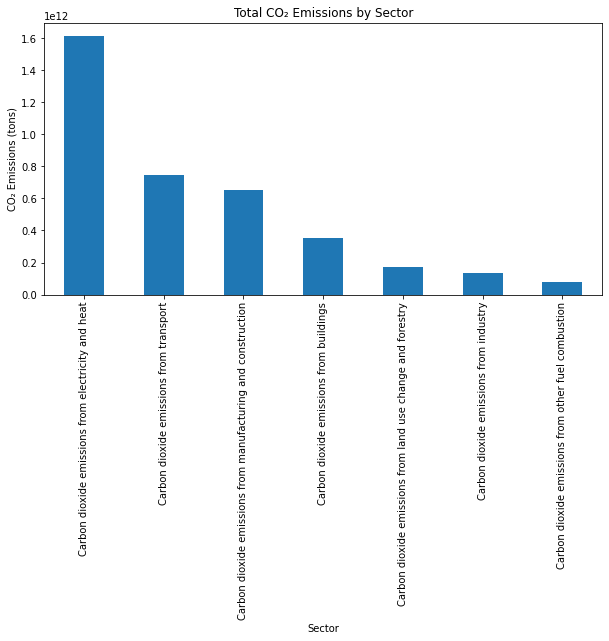

In [29]:
### EDA
#emission by columns
emission_columns = [
    "Carbon dioxide emissions from buildings",
    "Carbon dioxide emissions from industry",
    "Carbon dioxide emissions from land use change and forestry",
    "Carbon dioxide emissions from other fuel combustion",
    "Carbon dioxide emissions from transport",
    "Carbon dioxide emissions from manufacturing and construction",
    "Carbon dioxide emissions from electricity and heat",
]

# Grouping emissions by sector (Summing over all years)
sector_emissions = co2emissions_bysector[emission_columns].sum()

# Convert to DataFrame for better visualization
sector_emissions_df = pd.DataFrame(sector_emissions, columns=["Total Emissions"])
sector_emissions_df = sector_emissions_df.sort_values(by="Total Emissions", ascending=False)

sector_emissions_df.plot(kind="bar", figsize=(10,5), legend=False)
plt.title("Total CO₂ Emissions by Sector")
plt.ylabel("CO₂ Emissions (tons)")
plt.xlabel("Sector")
plt.show()

Carbon dioxide emissions from electricity and heat has most emissions

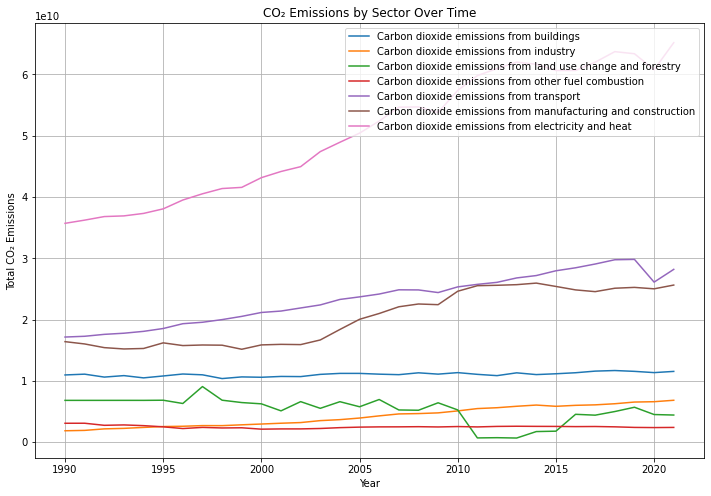

In [30]:
# emissions by year
sector_yearly = co2emissions_bysector.groupby('Year')[emission_columns].sum()

plt.figure(figsize=(12,8))
for sector in emission_columns:
    plt.plot(sector_yearly.index, sector_yearly[sector], label=sector)
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions")
plt.title("CO₂ Emissions by Sector Over Time")
plt.grid()
plt.legend(loc='upper right');

Electricity & heat production is the largest source of emissions
Transport and industry are growing steadily
land-use change has irregular trends, likely due to deforestation and conversation efforts
A drop in emissions aorund 2020 could be linked to COVID-19 economic slowdows

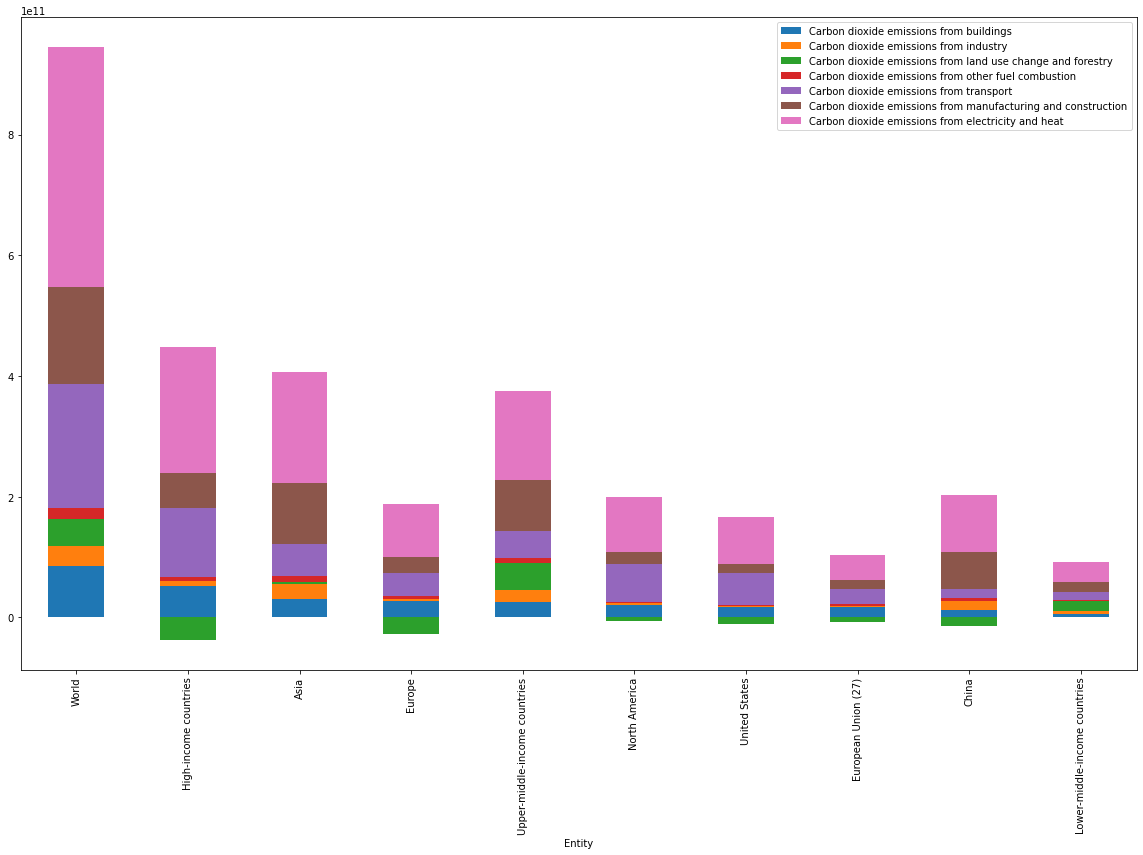

In [31]:
#emissions by year and country
co2emissions = co2emissions_bysector.groupby('Entity')[emission_columns].sum().sort_values(by=emission_columns,ascending=False).head(10)
co2emissions.plot(kind='bar',stacked=True,figsize=(20,12));

### Fouth Dataset

In [32]:
Global_sea_level_rise = pd.read_csv('../data/Climate Change - datasets/Global_sea_level_rise.csv')
Global_sea_level_rise

,year,date,mmfrom1993-2008average
0,1880,07/15/1880,-183.247396
1,1881,07/15/1881,-174.014062
2,1882,07/15/1882,-190.080729
3,1883,07/15/1883,-185.147396
4,1884,07/15/1884,-166.280729
...,...,...,...
138,2018,7/15/2018,53.085122
139,2019,7/15/2019,61.393713
140,2020,7/15/2020,66.704325
141,2021,7/15/2021,63.290000


In [33]:
#Understanding the data
data_understanding(Global_sea_level_rise)

Check the number of rows and columns
The dataset has 143 rows
The dataset has 3 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    143 non-null    int64  
 1   date                    143 non-null    object 
 2   mmfrom1993-2008average  143 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ KB
None


Check missing values
year                      0
date                      0
mmfrom1993-2008average    0
dtype: int64
year                      0.0
date                      0.0
mmfrom1993-2008average    0.0
dtype: float64


Check data statistics (numeric)


,year,mmfrom1993-2008average
count,143.00000,143.000000
mean,1951.00000,-79.729820
std,41.42463,69.902279
min,1880.00000,-190.080729
25%,1915.50000,-138.397396
50%,1951.00000,-87.447396
75%,1986.50000,-25.564062
max,2022.00000,69.660000




Check data statistics (categorical)


,date
count,143
unique,143
top,07/15/1880
freq,1




Check for duplicates
Dataset has 0 Duplicates 


Data has no missing values.

The dataset represents sea level anomalies relative to a reference baseline overtime spanning from 1880 - 2022
on average sea levels is below the reference point and has  a maximum anomaly above sea level

### EDA

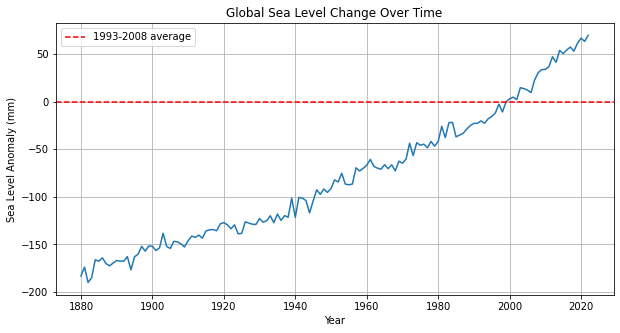

In [34]:
#sea level rise yearly
plt.figure(figsize=(10,5))
plt.plot(Global_sea_level_rise['year'], Global_sea_level_rise['mmfrom1993-2008average'])
plt.axhline(0, c='r', ls='--',label='1993-2008 average')
plt.xlabel('Year')
plt.ylabel('Sea Level Anomaly (mm)')
plt.title('Global Sea Level Change Over Time')
plt.legend()
plt.grid(True)

we see a clear upward trend in global sea levels,particularly accelerating in recent decades. 
human activities, such as fossil fuel emissions and deforestation, are likely contributing to this increase through climate change and global warming.

### 5th dataset green house gas-emissions-by-sector.csv

In [35]:
green_house_emission = pd.read_csv('../data/Climate Change - datasets/green house gas-emissions-by-sector.csv')
green_house_emission

,Entity,Code,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,AFG,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,970000.0,320000.0,280000.0,0.0,20000.00
1,Afghanistan,AFG,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00
2,Afghanistan,AFG,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00
3,Afghanistan,AFG,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00
4,Afghanistan,AFG,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,10780000.0,87290000.0,2540000.0,3600000.00,1680000.0,1260000.0,2069999.9,5130000.0,700000.0,410000.0,129999.99
6556,Zimbabwe,ZWE,2018,10870000.0,87380000.0,2590000.0,3610000.00,1830000.0,1560000.0,2710000.0,5430000.0,710000.0,480000.0,160000.00
6557,Zimbabwe,ZWE,2019,10620000.0,87330000.0,2640000.0,3530000.00,1810000.0,1630000.0,2320000.0,5020000.0,730000.0,440000.0,160000.00
6558,Zimbabwe,ZWE,2020,9760000.0,87210000.0,2690000.0,3650000.00,1900000.0,1420000.0,1580000.0,3870000.0,750000.0,500000.0,60000.00


In [36]:
# understanding the dataset
data_understanding(green_house_emission)

Check the number of rows and columns
The dataset has 6560 rows
The dataset has 14 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 14 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6560 non-null   object 
 1   Code                                                           6208 non-null   object 
 2   Year                                                           6560 non-null   int64  
 3   Greenhouse gas emissions from agriculture                      6557 non-null   float64
 4   Greenhouse gas emissions from land use change and forestry     6557 non-null   float64
 5   Greenhouse gas emissions from waste                            6496 non-null   float64
 6   Greenhouse gas emissions from buildings      

,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
count,6560.000000,6.557000e+03,6.557000e+03,6.496000e+03,6.421000e+03,6.560000e+03,6.421000e+03,6.421000e+03,6.421000e+03,6.496000e+03,6.421000e+03,6.421000e+03
mean,2005.500000,1.060862e+08,3.095737e+07,2.997569e+07,6.066295e+07,3.869813e+07,1.020892e+08,1.196178e+08,2.526939e+08,5.400387e+07,1.271678e+07,1.949380e+07
std,9.233796,4.608388e+08,2.632920e+08,1.326395e+08,2.740674e+08,2.014247e+08,5.187271e+08,5.939497e+08,1.222167e+09,2.511666e+08,5.882962e+07,9.578905e+07
min,1990.000000,0.000000e+00,-1.628370e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1997.750000,9.900000e+05,-6.700000e+05,4.000000e+05,1.300000e+05,1.100000e+05,1.800000e+05,6.000000e+05,2.100000e+05,0.000000e+00,0.000000e+00,6.000000e+04
50%,2005.500000,6.990000e+06,6.000000e+04,1.870000e+06,1.430000e+06,9.300000e+05,1.520000e+06,3.250000e+06,4.010000e+06,3.200000e+05,2.600000e+05,5.600000e+05
75%,2013.250000,2.744000e+07,1.064000e+07,7.390000e+06,8.920000e+06,5.550000e+06,1.351000e+07,1.892000e+07,3.409000e+07,8.487500e+06,2.090000e+06,3.230000e+06
max,2021.000000,5.864000e+09,2.796530e+09,1.677360e+09,3.091260e+09,3.260350e+09,6.472360e+09,8.493200e+09,1.630219e+10,3.336260e+09,7.686300e+08,1.338160e+09




Check data statistics (categorical)


,Entity,Code
count,6560,6208
unique,205,194
top,Afghanistan,AFG
freq,32,32




Check for duplicates
Dataset has 0 Duplicates 


Dataset has missing values we will replace missing with median and the code column with placeholder region.
Greenhouse gas emissions from agriculture more followed by from electricity and heat.Afganistan most frequent here as well
Our dataset has no duplicates

In [37]:
columns = [
    'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from land use change and forestry',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from electricity and heat',
       'Fugitive emissions of greenhouse gases from energy production',
       'Greenhouse gas emissions from other fuel combustion',
       'Greenhouse gas emissions from bunker fuels'
]
#fill numeric columns with median
green_house_emission[columns] = green_house_emission[columns].apply(lambda x: x.fillna(x.median()))
#fill code NAN
green_house_emission['Code'].fillna('Region',inplace=True)
#confirm fill
print(green_house_emission.isna().sum()) #clean

Entity                                                           0
Code                                                             0
Year                                                             0
Greenhouse gas emissions from agriculture                        0
Greenhouse gas emissions from land use change and forestry       0
Greenhouse gas emissions from waste                              0
Greenhouse gas emissions from buildings                          0
Greenhouse gas emissions from industry                           0
Greenhouse gas emissions from manufacturing and construction     0
Greenhouse gas emissions from transport                          0
Greenhouse gas emissions from electricity and heat               0
Fugitive emissions of greenhouse gases from energy production    0
Greenhouse gas emissions from other fuel combustion              0
Greenhouse gas emissions from bunker fuels                       0
dtype: int64


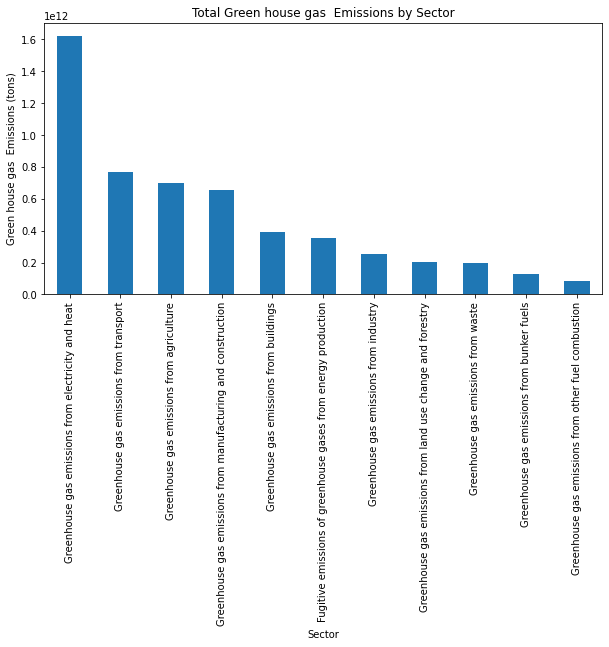

In [38]:
## EDA
#green house by sector

# Grouping green house emissions by sector (Summing over all years)
greenhousesector_emissions = green_house_emission[columns].sum()

# Convert to DataFrame for better visualization
sector_emissions_df = pd.DataFrame(greenhousesector_emissions, columns=["Total Emissions"])
sector_emissions_df = sector_emissions_df.sort_values(by="Total Emissions", ascending=False)

sector_emissions_df.plot(kind="bar", figsize=(10,5), legend=False)
plt.title("Total Green house gas  Emissions by Sector")
plt.ylabel("Green house gas  Emissions (tons)")
plt.xlabel("Sector")
plt.show()

Greenhouse gas emissions from electricity and heat followed by transport

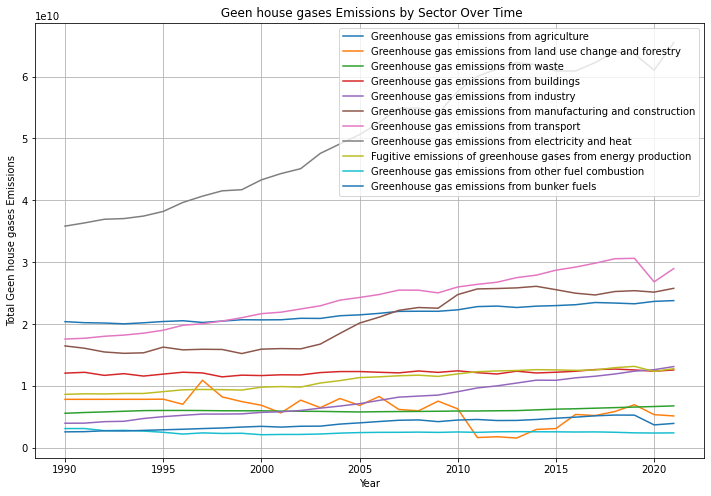

In [39]:
#by time
sector_yearly = green_house_emission.groupby('Year')[columns].sum()
plt.figure(figsize=(12,8))
for sector in columns:
    plt.plot(sector_yearly.index, sector_yearly[sector], label=sector)
plt.xlabel("Year")
plt.ylabel("Total Geen house gases Emissions")
plt.title(" Geen house gases Emissions by Sector Over Time")
plt.grid()
plt.legend(loc='upper right');

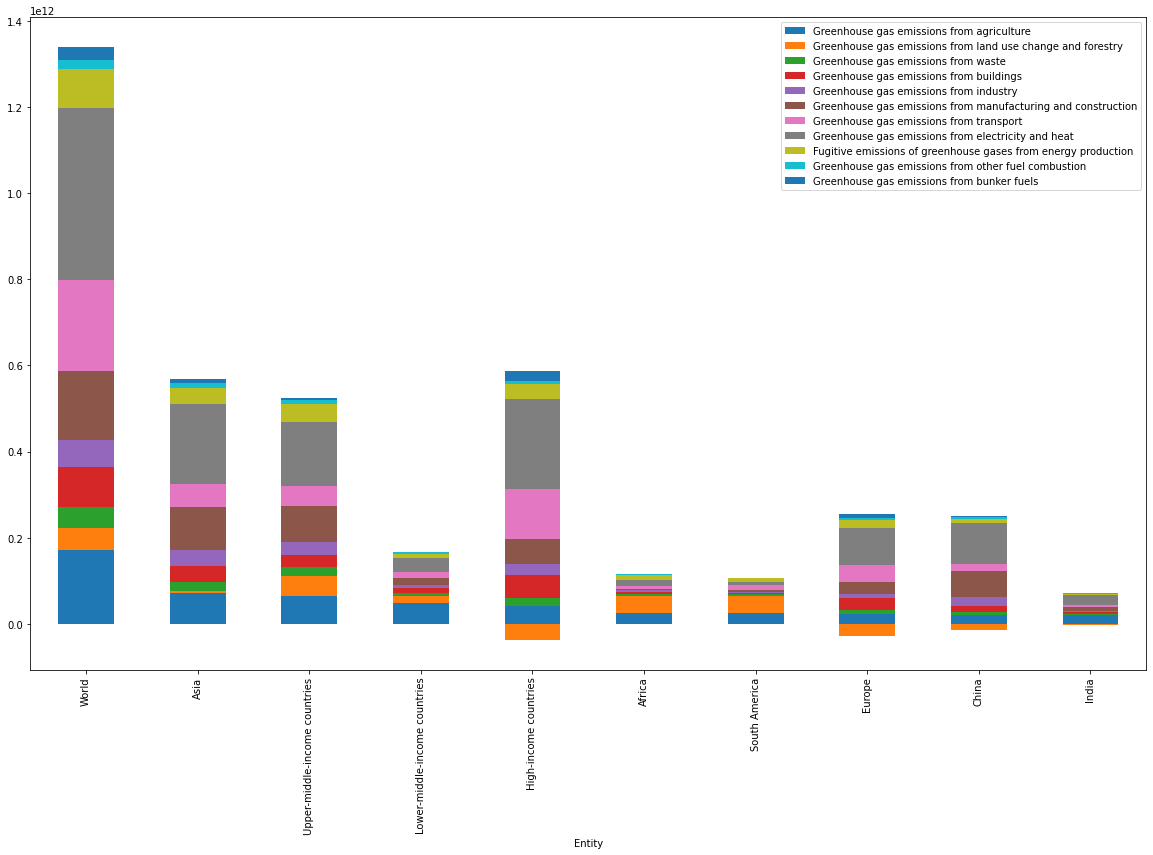

In [40]:
#emissions by year and country
green_emissions = green_house_emission.groupby('Entity')[columns].sum().sort_values(by=columns,ascending=False).head(10)
green_emissions.plot(kind='bar',stacked=True,figsize=(20,12));


World has the highest total emissions – This is expected as it aggregates all regions.
Asia, High-Income Countries, and Upper-Middle-Income Countries have similar emission levels, slightly lower than the total world emissions.
China and Europe have comparable emissions, though slightly lower than the major regional groups.
India and Lower-Middle-Income Countries have the lowest emissions in the dataset.

### 6th per capital co2

In [41]:
per_capita_co2 = pd.read_csv('../data/Climate Change - datasets/per-capita-co2-vs-average.csv')
per_capita_co2

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123
...,...,...,...,...
26177,Zimbabwe,ZWE,2019,0.672038
26178,Zimbabwe,ZWE,2020,0.547083
26179,Zimbabwe,ZWE,2021,0.645913
26180,Zimbabwe,ZWE,2022,0.648759


In [42]:
### undertanding dataset
data_understanding(per_capita_co2)

Check the number of rows and columns
The dataset has 26182 rows
The dataset has 4 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26182 entries, 0 to 26181
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             26182 non-null  object 
 1   Code                               22895 non-null  object 
 2   Year                               26182 non-null  int64  
 3   Annual CO₂ emissions (per capita)  26182 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 818.3+ KB
None


Check missing values
Entity                                  0
Code                                 3287
Year                                    0
Annual CO₂ emissions (per capita)       0
dtype: int64
Entity                                0.000000
Code                                 12.554427
Year                              

,Year,Annual CO₂ emissions (per capita)
count,26182.000000,26182.000000
mean,1952.841074,3.815395
std,53.168164,14.383452
min,1750.000000,0.000000
25%,1919.000000,0.169388
50%,1965.000000,1.013228
75%,1995.000000,4.296536
max,2023.000000,782.682070




Check data statistics (categorical)


,Entity,Code
count,26182,22895
unique,231,215
top,United Kingdom,NOR
freq,229,229




Check for duplicates
Dataset has 0 Duplicates 


Code column has missing values for regions and income types.lets relace with region

Highly skewed distribution: A few entities have extremely high emissions, raising the mean significantly above the median.
Most entities emit little CO₂ per capita, as shown by the 25th percentile at 0.17 tons.
A long history of recorded emissions, spanning from 1750 to 2023.

United Kingdom appears most often, suggesting frequent records for this entity.

no duplicates

In [43]:
print(f"Entities with missing codes:\n{per_capita_co2.query('Code.isna()')['Entity'].unique()}")
#fill code NAN
per_capita_co2['Code'].fillna('Region',inplace=True)
#confirm fill
print(per_capita_co2.isna().sum())

Entities with missing codes:
['Africa' 'Asia' 'Asia (excl. China and India)' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'North America'
 'North America (excl. USA)' 'Oceania' 'South America'
 'Upper-middle-income countries']
Entity                               0
Code                                 0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64


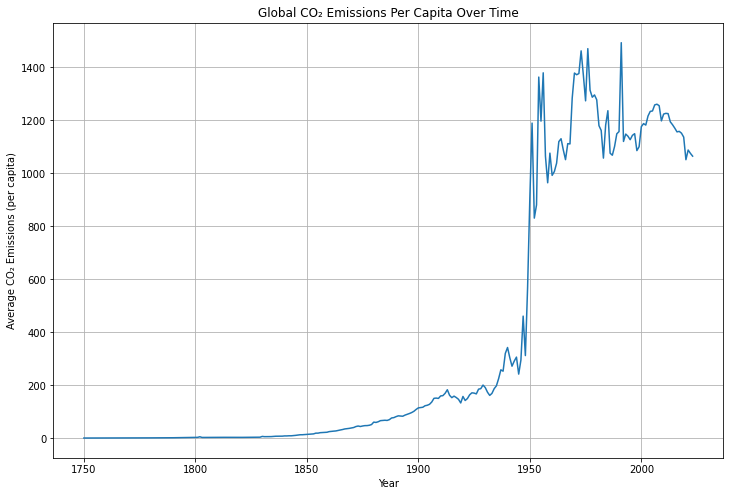

In [44]:
#EDA
#Per capita emissions per year
per_capita_co2.groupby('Year')['Annual CO₂ emissions (per capita)'].sum().plot(figsize=(12,8))
# Labels and title
plt.xlabel("Year")
plt.ylabel("Average CO₂ Emissions (per capita)")
plt.title("Global CO₂ Emissions Per Capita Over Time")
plt.grid(True);

Pre-Industrial Era (Before 1850):

Emissions were nearly flat and minimal.
This suggests very low fossil fuel use before industrialization.
Industrial Revolution (1850–1950):

A gradual increase is observed.
This aligns with the rise of coal and early industrial activities.
Post-WWII Boom (1950s–1980s):

Sharp spike in emissions, likely due to industrial expansion and energy consumption.
The development of cars, factories, and power plants significantly increased emissions.
Fluctuations in Recent Decades (1980s–2020s):

There are peaks and drops, possibly due to economic crises, energy transitions, or climate policies.
A declining trend after the 2000s may indicate shifts towards renewable energy.

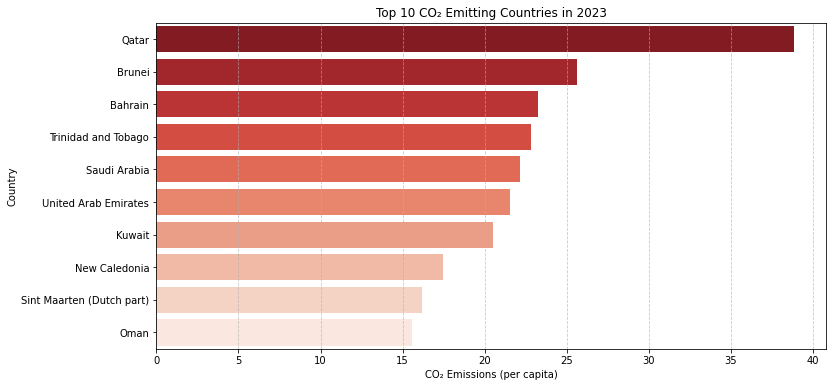

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the most recent year
latest_year = per_capita_co2["Year"].max()

# Filter for the latest year and get top 10 emitters
top_emitters = per_capita_co2[per_capita_co2["Year"] == latest_year].nlargest(10, "Annual CO₂ emissions (per capita)")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_emitters, x="Annual CO₂ emissions (per capita)", y="Entity", palette="Reds_r")

plt.xlabel("CO₂ Emissions (per capita)")
plt.ylabel("Country")
plt.title(f"Top 10 CO₂ Emitting Countries in {latest_year}")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


### total-greenhouse gas-emissions

In [46]:
total_greenhouse_emissions = pd.read_csv('../data/Climate Change - datasets/total-greenhouse gas-emissions.csv')
total_greenhouse_emissions

,Entity,Code,Year,Annual greenhouse gas emissions in CO₂ equivalents
0,Afghanistan,AFG,1850,7435743.5
1,Afghanistan,AFG,1851,7499858.5
2,Afghanistan,AFG,1852,7560495.5
3,Afghanistan,AFG,1853,7619898.0
4,Afghanistan,AFG,1854,7678120.0
...,...,...,...,...
37405,Zimbabwe,ZWE,2019,34347856.0
37406,Zimbabwe,ZWE,2020,31322906.0
37407,Zimbabwe,ZWE,2021,33549390.0
37408,Zimbabwe,ZWE,2022,33772416.0


In [47]:
data_understanding(total_greenhouse_emissions)

Check the number of rows and columns
The dataset has 37410 rows
The dataset has 4 columns

Check data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              37410 non-null  object 
 1   Code                                                34278 non-null  object 
 2   Year                                                37410 non-null  int64  
 3   Annual greenhouse gas emissions in CO₂ equivalents  37410 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB
None


Check missing values
Entity                                                   0
Code                                                  3132
Year                                                     0
Annual greenhouse gas emissions 

,Year,Annual greenhouse gas emissions in CO₂ equivalents
count,37410.000000,3.741000e+04
mean,1936.500000,4.885422e+08
std,50.229315,2.392580e+09
min,1850.000000,-1.496139e+07
25%,1893.000000,1.835210e+06
50%,1936.500000,1.500753e+07
75%,1980.000000,7.824313e+07
max,2023.000000,5.381685e+10




Check data statistics (categorical)


,Entity,Code
count,37410,34278
unique,215,197
top,Afghanistan,AFG
freq,174,174




Check for duplicates
Dataset has 0 Duplicates 


Code has missing values

The years range from 1850 to 2023.
The mean year is 1936.5, which makes sense for a dataset spanning over a long period.
The emissions column has a mean of 4.89 × 10⁸ CO₂ equivalents, but the standard deviation is large (2.39 × 10⁹), indicating high variability.
The minimum emission value is negative (-1.49 × 10⁷ CO₂ equivalents), which might suggest an error or a data correction entry.

In [48]:
print(f"Entities with missing codes:\n{total_greenhouse_emissions.query('Code.isna()')['Entity'].unique()}")
#fill code NAN
total_greenhouse_emissions['Code'].fillna('Region',inplace=True)
#confirm fill
print(per_capita_co2.isna().sum())

Entities with missing codes:
['Africa' 'Asia' 'Asia (excl. China and India)' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'High-income countries'
 'Least developed countries (Jones et al.)' 'Low-income countries'
 'Lower-middle-income countries' 'North America'
 'North America (excl. USA)' 'OECD (Jones et al.)' 'Oceania'
 'South America' 'Upper-middle-income countries']
Entity                               0
Code                                 0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64


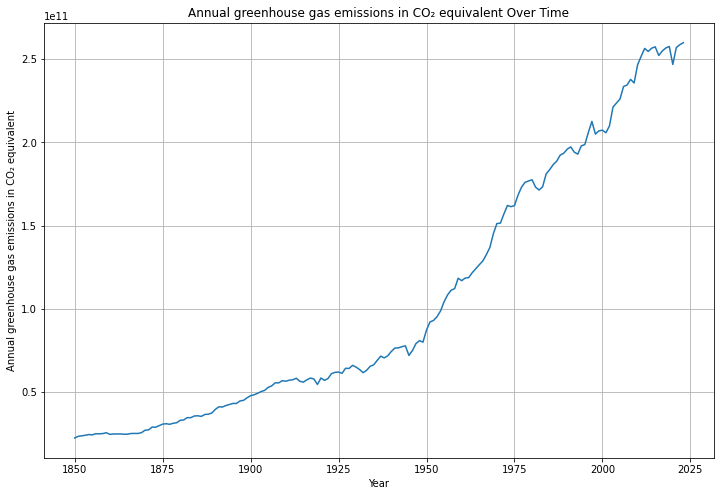

In [49]:
### EDA
#Per capita emissions per year
total_greenhouse_emissions.groupby('Year')['Annual greenhouse gas emissions in CO₂ equivalents'].sum().plot(figsize=(12,8))
# Labels and title
plt.xlabel("Year")
plt.ylabel("Annual greenhouse gas emissions in CO₂ equivalent")
plt.title("Annual greenhouse gas emissions in CO₂ equivalent Over Time")
plt.grid(True);

green house emissions increased over time

### check cleaned datasets

In [50]:
print(len(air_quality))
air_quality.head()

17821


,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [51]:
print(len(source_industry))
source_industry.head()

34762


,Entity,Code,Year,Annual CO₂ emissions from cement,Annual CO₂ emissions from gas,Annual CO₂ emissions from oil,Annual CO₂ emissions from coal
0,Afghanistan,AFG,1970,47350.0,216651.0,671986.0,436974.0
1,Afghanistan,AFG,1971,43234.0,439680.0,747456.0,359072.0
2,Afghanistan,AFG,1972,46427.0,300448.0,626544.0,190528.0
3,Afghanistan,AFG,1973,67106.0,332680.0,701918.0,310745.0
4,Afghanistan,AFG,1974,70301.0,400141.0,770914.0,304695.0


In [52]:
print(len(co2emissions_bysector))
co2emissions_bysector.head()

6560


,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,320000.0,20000.0
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,300000.0,20000.0
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,200000.0,20000.0
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,200000.0,20000.0
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,190000.0,20000.0


In [53]:
print(len(green_house_emission))
green_house_emission.head()

6560


,Entity,Code,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,AFG,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,970000.0,320000.0,280000.0,0.0,20000.0
1,Afghanistan,AFG,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.0
2,Afghanistan,AFG,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.0
3,Afghanistan,AFG,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.0
4,Afghanistan,AFG,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.0


In [54]:
print(len(Global_sea_level_rise))
Global_sea_level_rise.head()

143


,year,date,mmfrom1993-2008average
0,1880,07/15/1880,-183.247396
1,1881,07/15/1881,-174.014062
2,1882,07/15/1882,-190.080729
3,1883,07/15/1883,-185.147396
4,1884,07/15/1884,-166.280729


In [55]:
print(len(per_capita_co2))
per_capita_co2.head()

26182


,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123


In [56]:
print(len(total_greenhouse_emissions))
total_greenhouse_emissions.head()

37410


,Entity,Code,Year,Annual greenhouse gas emissions in CO₂ equivalents
0,Afghanistan,AFG,1850,7435743.5
1,Afghanistan,AFG,1851,7499858.5
2,Afghanistan,AFG,1852,7560495.5
3,Afghanistan,AFG,1853,7619898.0
4,Afghanistan,AFG,1854,7678120.0
